In [1]:
%%capture
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

import pandana as pdna
from urbansim.utils import misc

from ipywidgets import interact
from ipywidgets import FloatSlider

from bokeh.io import output_notebook, show
from bokeh.plotting import Figure
from datashader.bokeh_ext import create_ramp_legend, create_categorical_legend

output_notebook()

import datashader.transfer_functions as tf

import datashader as ds
from datashader.colors import viridis

import orca

from lcog import datasources
from lcog import variables
from lcog import models

def visualize_parcel_variable(var_name):
    parcels = orca.get_table('parcels').to_frame(['x', 'y', var_name])

    cvs = ds.Canvas(plot_width=700, plot_height=500)
    agg = cvs.points(parcels, 'x', 'y', ds.mean(var_name))
    img = tf.set_background(tf.shade(agg, cmap=viridis),"white")
    return img

def cl_network_access_plot(table_var_name, distance, agg_function, decay):
    network.set(craigslist.node_id, variable = craigslist[table_var_name])
    results = network.aggregate(distance, type=agg_function, decay=decay)
    
    access_var_name = '_'.join([agg_function, table_var_name, str(distance), decay])
    parcels[access_var_name] = misc.reindex(results, parcels.node_id)

    cvs = ds.Canvas(plot_width=700, plot_height=500)
    agg = cvs.points(parcels, 'x', 'y', ds.mean(access_var_name))
    img = tf.set_background(tf.shade(agg, cmap=viridis),"white")
    return img

orca.run(['build_networks'])

craigslist = orca.get_table('craigslist').local
network = orca.get_injectable('net')
parcels = orca.get_table('parcels').local

In [2]:
print('There are %s craigslist rental observations.' % len(craigslist))
craigslist.head()

There are 29314 craigslist rental observations.


,date,rent,bedrooms,sqft,rent_sqft,longitude,latitude,bathrooms,node_id
0,2016-11-13,975.0,3.0,1000.0,0.975000,-123.123178,44.092948,NaN,40011021
1,2016-11-13,1600.0,3.0,2100.0,0.761905,-123.061400,44.038500,NaN,40204767
2,2016-11-13,1275.0,2.0,832.0,1.532452,-123.082881,44.023681,NaN,1377836343
3,2016-11-13,10000.0,2.0,840.0,20.238095,-122.917100,44.056100,NaN,4214004554
4,2016-11-13,1150.0,2.0,884.0,1.300905,-123.061230,44.092548,NaN,2251405279


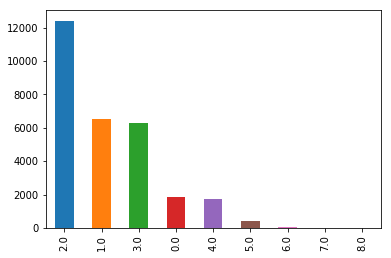

In [3]:
craigslist.bedrooms.value_counts().plot(kind='bar')

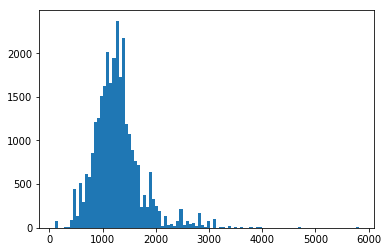

In [4]:
plt.hist(craigslist.rent[craigslist.rent < 6000],bins= 100);

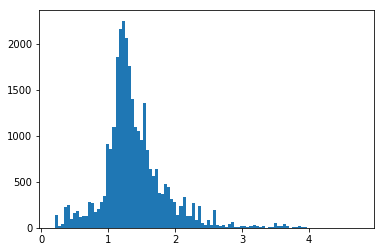

In [5]:
plt.hist(craigslist.rent_sqft[craigslist.rent_sqft < 5],bins= 100);

In [6]:
interact(cl_network_access_plot, table_var_name=[col for col in craigslist.columns if col != 'date'], distance=FloatSlider(min=200, max=5000, step=100, continuous_update=False), agg_function=['sum', 'ave', 'std'], decay=['flat', 'linear'])

interactive(children=(Dropdown(description='table_var_name', options=('rent', 'bedrooms', 'sqft', 'rent_sqft',…

<function __main__.cl_network_access_plot(table_var_name, distance, agg_function, decay)>